# Task2: Attribute SDG Mapping

The goal will be India focused.

In [1]:
import geopandas as gpd
import pandas as pd
import io, requests
import matplotlib.pyplot as plt

For this project I am considering two SDGS:
1. SDG13 -Take urgent action to combat climate change and its impacts
    
2. SDG15 - Protect, restore and promote sustainable use of terrestrial ecosystems, sustainably manage forests, combat   desertification, and halt and reverse land degradation and halt biodiversity loss. 

These two SDGS are along with few others are significantly related to Land sector dataset.

### Holdridge Life Zone

holdridge_life_Zonedf= gpd.read_file("C:\\Users\\sanja\\OneDrive\\Desktop\\HoldridgeLifeZones.json")
holdridge_life_Zonedf.head()

In [6]:
# loading administrative boundary of India
gdf_boundary = gpd.read_file("C:\\Users\\sanja\\OneDrive\\Desktop\\IND_AL2_India.json")      # Country wise data
gdf_all_states = gpd.read_file("C:\\Users\\sanja\\OneDrive\\Desktop\\IND_ALL_states.json") #state wise

In [10]:
#india specific data
holdridge_india_df = holdridge_life_Zonedf.clip(gdf_boundary)
holdridge_india_df

,FID,AREA,PERIMETER,HOLDRIG_,HOLDRIG_ID,ZONE,CASE_,FREQUENCY,DESC,SYMBOL,geometry
3149,3149,0.50,3,3151,2621,29,30,238,Subtropical moist forest,78,"POLYGON ((74.00000 17.00000, 74.00000 16.50000..."
3127,3127,0.25,2,3129,2617,38,39,30,Tropical wet forest,23,"POLYGON ((74.00000 17.50000, 74.00000 17.00000..."
3126,3126,0.25,2,3128,2616,31,32,7,Subtropical rain forest,23,"MULTIPOLYGON (((73.27723 17.00000, 73.27727 17..."
3104,3104,0.25,2,3106,2610,38,39,30,Tropical wet forest,23,"MULTIPOLYGON (((73.50000 18.00000, 73.50000 17..."
3105,3105,0.25,2,3107,2612,30,31,116,Subtropical wet forest,23,"POLYGON ((74.00000 18.00000, 74.00000 17.50000..."
...,...,...,...,...,...,...,...,...,...,...,...
2402,2402,0.25,2,2404,1557,4,5,148,Polar moist tundra,3,"POLYGON ((79.00000 33.00000, 78.50000 33.00000..."
2401,2401,0.25,2,2403,1555,5,6,241,Polar wet tundra,3,"POLYGON ((77.50000 33.50000, 77.50000 33.00000..."
2323,2323,2.50,9,2325,1537,15,16,246,Cool temperate moist forest,110,"POLYGON ((74.00000 33.74141, 74.00164 33.74191..."
2369,2369,0.50,3,2371,1556,3,4,54,Polar dry tundra,128,"POLYGON ((78.50000 33.50000, 78.50000 34.00000..."


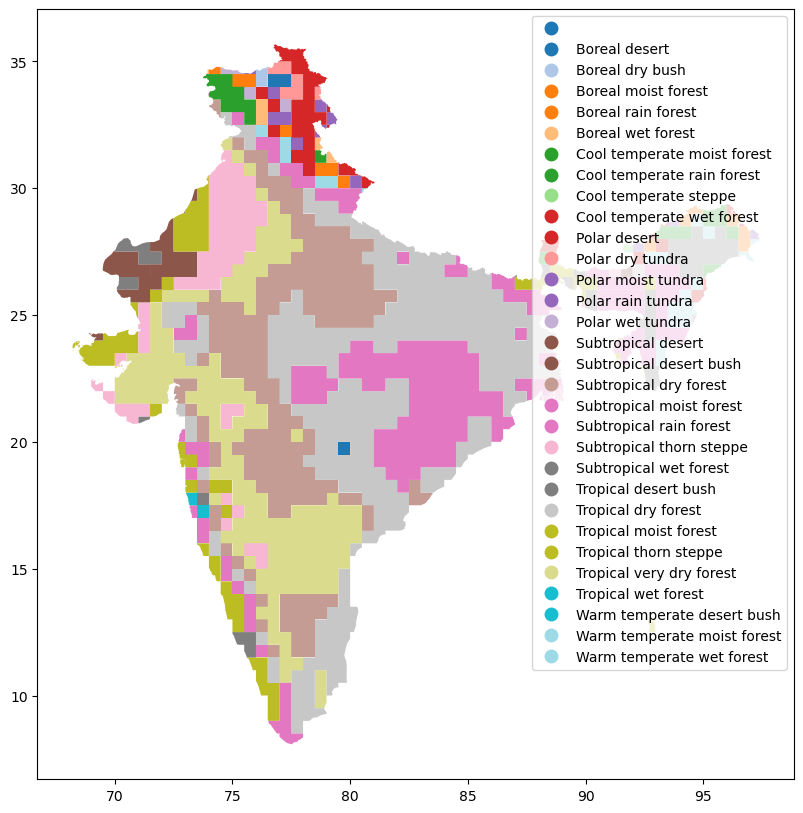

In [14]:
holdridge_india_df.plot(cmap='tab20',column= 'DESC',legend=True, figsize=(10,10))
plt.show()

The Holdridge Life Zone System, are a way to classify and categorize global ecosystems based on a combination of climate, particularly temperature and precipitation. This system was developed by American ecologist Leslie Holdridge in the mid-20th century to help understand and describe the relationships between climate and vegetation. It's used to classify and delineate ecological zones around the world. The system takes into account the following factors:

Annual Precipitation: The amount of rainfall an area receives annually.

Biotemperature: A measure of the average temperature in an area, with adjustments made for extreme cold and hot temperatures. It's calculated by taking the average of the monthly mean temperatures.

Potential Evapotranspiration: This is a measure of the potential loss of water through evaporation and transpiration (water taken up by plans)

This data is relevant to the UN SDG13 that is: CLIMATE ACTION

Each of these zones have different vulnerabilities and challenges while dealing with climate change. Different regions will require different stratigies for climate action.



Type of Holdridge Life zone can also be mapped to SDG15 that is : LIFE ON LAND

Protect, restore and promote sustainable use of terrestrial ecosystems, sustainably manage forests, combat desertification, and halt and reverse land degradation and halt biodiversity loss.

### Biodiversity Hotspots

In [15]:
#loading data for bio diversity hotspots across the world

Bio_hotspots_data= gpd.read_file("C:\\Users\\sanja\\OneDrive\\Desktop\\CI_BiodiversityHotspots.geojson")
Bio_hotspots_data.head()


,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -..."
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -..."
4,5,New Caledonia,hotspot area,24.637100,1.646954,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161..."


In [16]:
#total number of hotspots

len(Bio_hotspots_data['NAME'].unique())    # finding unique rows in "NAME" column

36

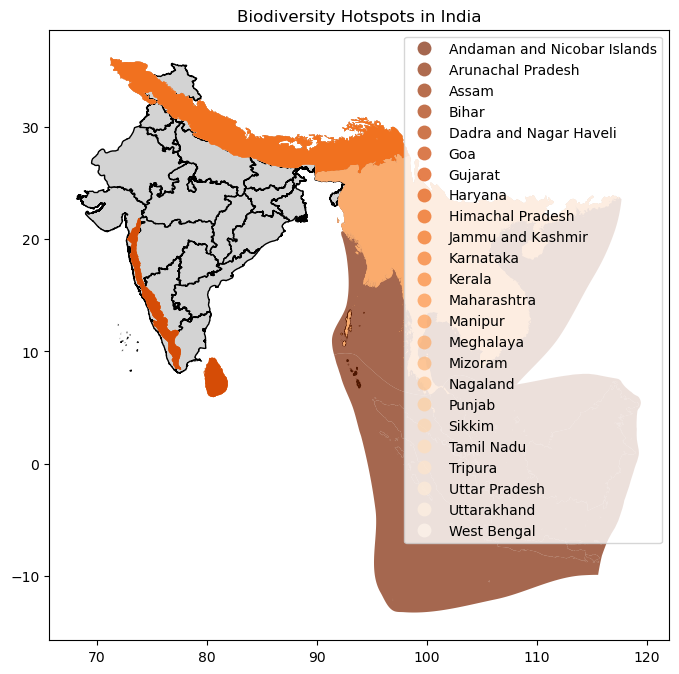

In [17]:
# Filtering the administrative data to select only India

india_admin = gdf_all_states[gdf_all_states['country'] == 'IND']

# Performing a spatial join to find hotspots in India

hotspots_in_india = gpd.sjoin(Bio_hotspots_data, india_admin, predicate='intersects')


ax = india_admin.plot(color='lightgray', edgecolor='black', figsize=(8, 8))

# Plotting the biodiversity hotspots on top of map of India

hotspots_in_india.plot(ax=ax,column='name', cmap='Oranges_r', alpha=0.7, legend=True)

plt.title("Biodiversity Hotspots in India")

plt.show()

In [20]:
hotspots_in_india[['NAME', 'Shape_Area']]

,NAME,Shape_Area
10,Himalaya,69.043477
10,Himalaya,69.043477
12,Indo-Burma,203.319990
10,Himalaya,69.043477
10,Himalaya,69.043477
12,Indo-Burma,203.319990
10,Himalaya,69.043477
12,Indo-Burma,203.319990
10,Himalaya,69.043477
10,Himalaya,69.043477


In [27]:
area = hotspots_in_india.groupby('NAME')['Shape_Area'].sum()
area

NAME
Himalaya                        897.565201
Indo-Burma                     1800.138149
Sundaland                       450.387807
Western Ghats and Sri Lanka     110.133815
Name: Shape_Area, dtype: float64

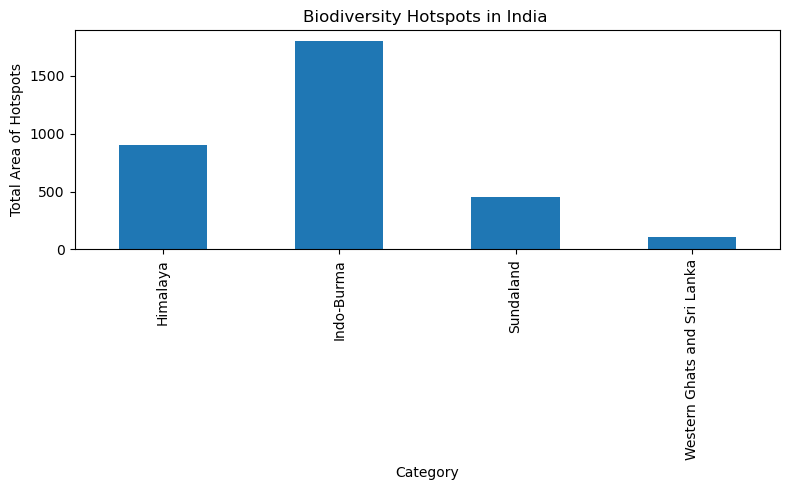

In [31]:
plt.figure(figsize=(8,5 ))
area.plot(kind='bar')  

plt.title('Biodiversity Hotspots in India ')
plt.xlabel('Category')
plt.ylabel('Total Area of Hotspots') 
 
plt.tight_layout()


plt.show()

The area of biodiversity hotspots must be conserved. It aligns with SDG15, that is:
Protect, restore and promote sustainable use of terrestrial ecosystems, sustainably manage forests, combat   desertification, and halt and reverse land degradation and halt biodiversity loss. 

It is also related to SDG15 : climatic actions


If there is any loss in biodiversity areas there should be urgent climatic action to stop it.
Biodiversity and climate change are closely interconnected and have a significant impact on each other.





The 'ROAD' directory' administrative dataset  :
This directory combines the best available roads data by country into a global roads coverage, using the UN Spatial Data Infrastructure Transport (UNSDI-T) version 2 as a common data model. All country road networks are joined topologically at the borders, and many countries are edited for internal topology.


It cab be mapped to SDG8:
DECENT WORK AND ECONOMIC GROWTH.
Better road connectivity leads to better access to services and opportunities. THe opportunities can include market, job, raw materials, education, etc.